In [1]:
import sys
cadEditorDir = "d:/DEV/CadEditor/CadEditor/"
sys.path.append(cadEditorDir)

import clr
clr.AddReference("CadEditor")
clr.AddReference("PluginVideoNes")

from PluginVideoNes import Video
from CadEditor import UtilsGDI
from System.Drawing import Bitmap
from System import Array, Byte
import array

In [2]:
videoName = cadEditorDir + "/R.C. Pro-Am 2 (U) [!p].bin"
romName = cadEditorDir + "/R.C. Pro-Am 2 (U) [!p].nes"
with open(romName, "rb") as f:
    d = f.read()
    
with open(videoName, "rb") as f:
    vd = f.read()

In [3]:
#Создаём экземляр плагина для отрисовки NES-графики
video = Video()

In [4]:
def toDotNetArray(data):
    return  Array[Byte](array.array('c', data))

CHR_ADDR = 0x1000 #адрес банка видеопамяти для фона первого уровня
CHR_BANK_SIZE = 0x1000
chrData = vd[CHR_ADDR:CHR_ADDR + CHR_BANK_SIZE]
chrData = toDotNetArray(chrData)

palData = map (chr,
               [0x00, 0x10, 0x0A, 0x05,
               0x00, 0x17, 0x0A, 0x07,
               0x00, 0x00, 0x0A, 0x0F,
               0x00, 0x0A, 0x11, 0x28])
palData = toDotNetArray(palData)

In [5]:
chrBitmap = video.makeImageRectangle(chrData, palData, 0, 2.0, True, False)

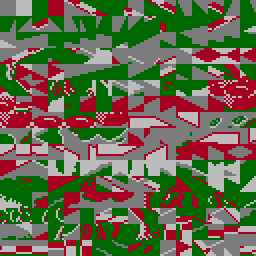

In [6]:
from IPython.display import display, Image
picPath = "D:/CadEditorPythonExamples/"
#сохраняем картинку в файл:
chrBitmap.Save(picPath+"chr0.png")

#отображаем её:
Image(filename=picPath+"chr0.png")

In [7]:
BLOCK_WIDTH = 16
BLOCK_HEIGHT = 8
BLOCK_SIZE = BLOCK_WIDTH * BLOCK_HEIGHT
PAL_BLOCK_SIZE = 8

In [8]:
def mapPalIndexesToBlock(pi):
    palBits = []
    for rowPi in (pi[:4],pi[4:]):
        palRow = []
        for palBlock in rowPi:
            palRow.append((palBlock>>0) & 0x3)
            palRow.append((palBlock>>0) & 0x3)
            palRow.append((palBlock>>2) & 0x3)
            palRow.append((palBlock>>2) & 0x3)
        palBits.extend(palRow)
        palBits.extend(palRow)

        palRow = []
        for palBlock in rowPi:
            palRow.append((palBlock>>4) & 0x3)
            palRow.append((palBlock>>4) & 0x3)
            palRow.append((palBlock>>6) & 0x3)
            palRow.append((palBlock>>6) & 0x3)
        palBits.extend(palRow)
        palBits.extend(palRow)
    return palBits

In [9]:
def makeBlock(addr, palAddr):
    bi = d[addr : addr + BLOCK_SIZE]
    bi = map(ord, bi)
    pi = d[palAddr : palAddr + PAL_BLOCK_SIZE]
    pi = map(ord, pi)
    
    palBytes = mapPalIndexesToBlock(pi)
    tileImages = [video.makeImage(bi[x], chrData, palData, palBytes[x], 2.0, True, False) for x in xrange(BLOCK_SIZE)]
    tileImage = UtilsGDI.GlueImages(Array[Bitmap](tileImages),BLOCK_WIDTH,BLOCK_HEIGHT)
    return tileImage

0


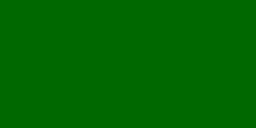

1


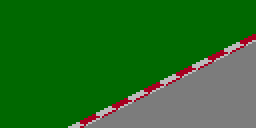

2


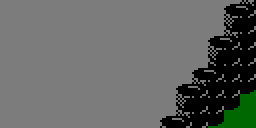

3


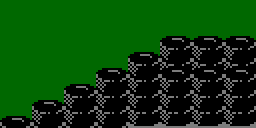

4


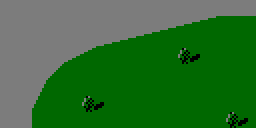

5


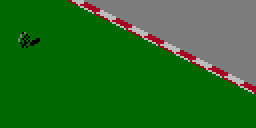

6


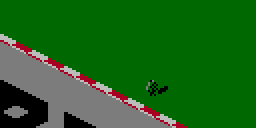

7


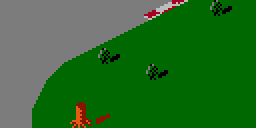

8


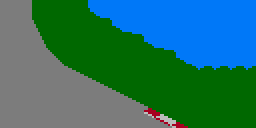

9


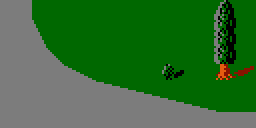

In [10]:
blockImages = []
BLOCK_ADDR = 0xa03c
BLOCK_PAL_ADDR = 0xF03C
for x in xrange(160):
    im = makeBlock(BLOCK_ADDR + x * BLOCK_SIZE, BLOCK_PAL_ADDR + x * PAL_BLOCK_SIZE)
    blockImages.append(im)

for x in xrange(10):
    print x
    blockImages[x].Save(picPath+"block%d.png"%x)
    display(Image(filename=picPath+"block%d.png"%x))

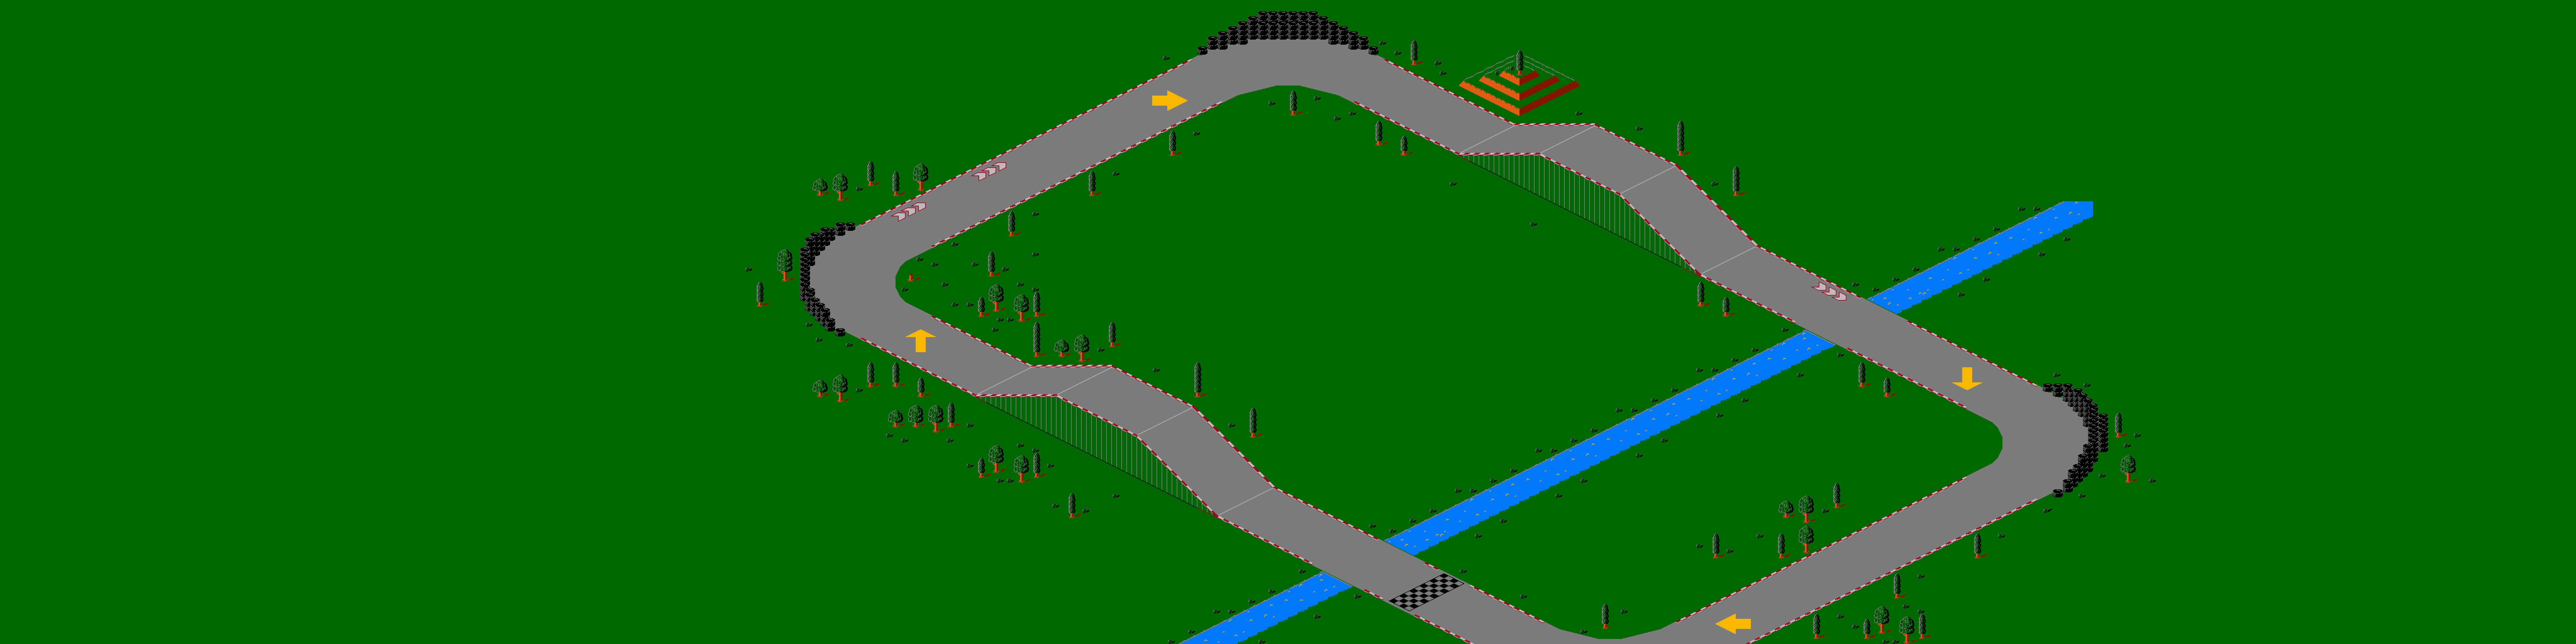

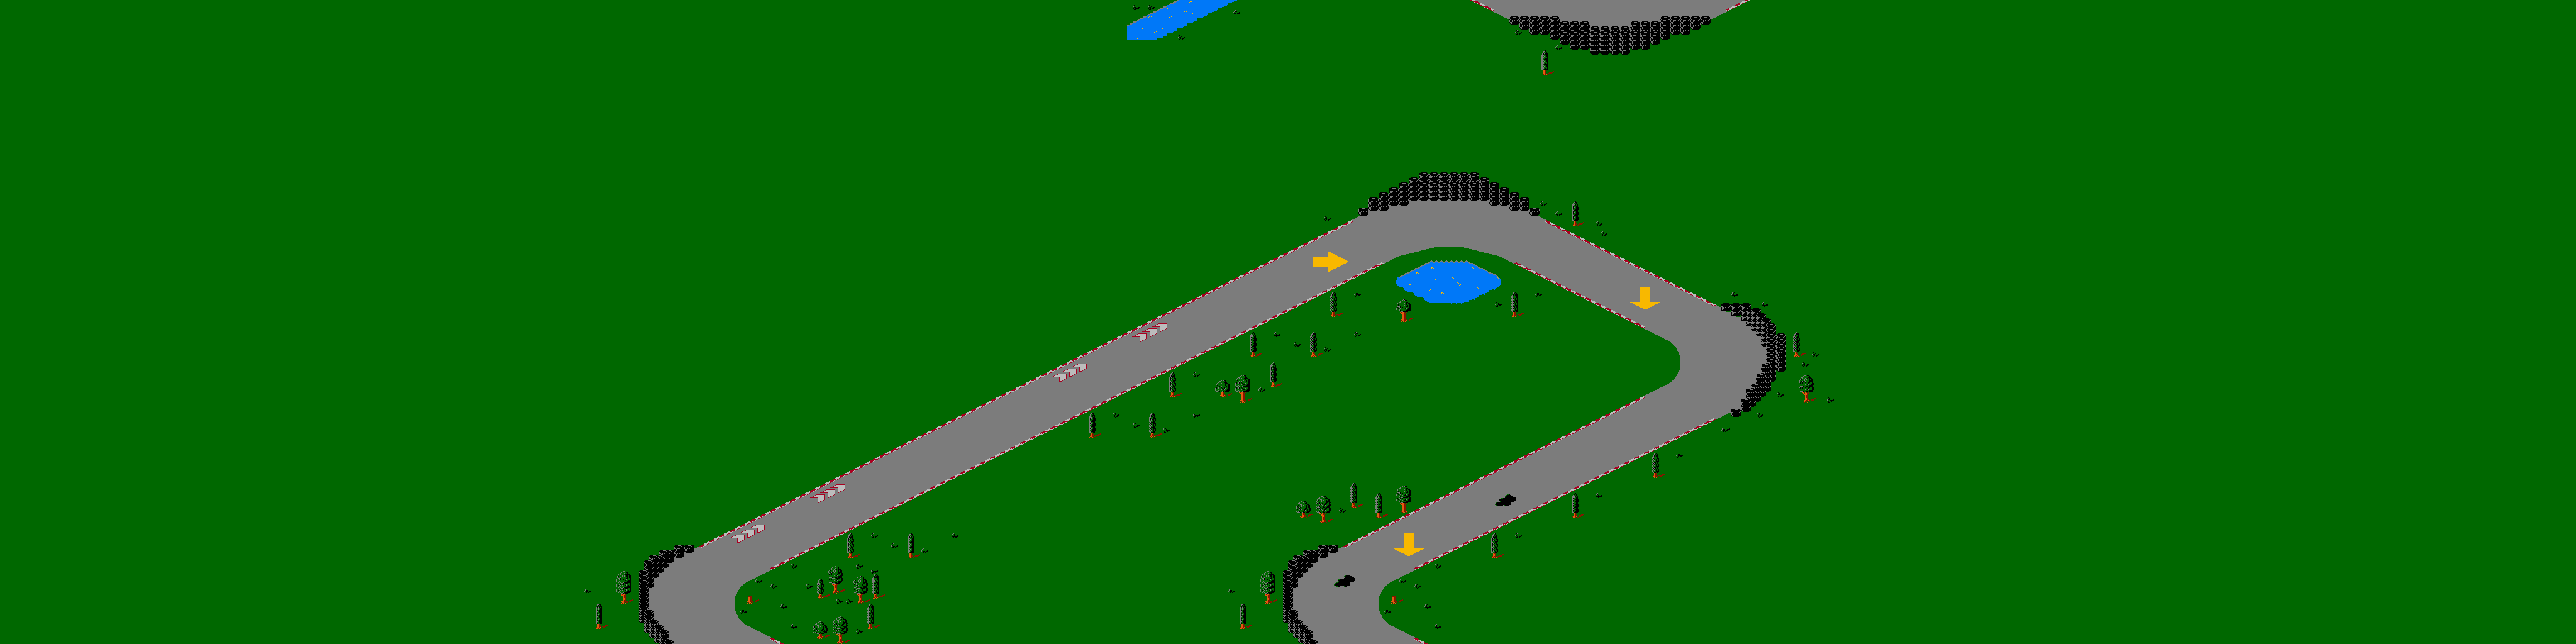

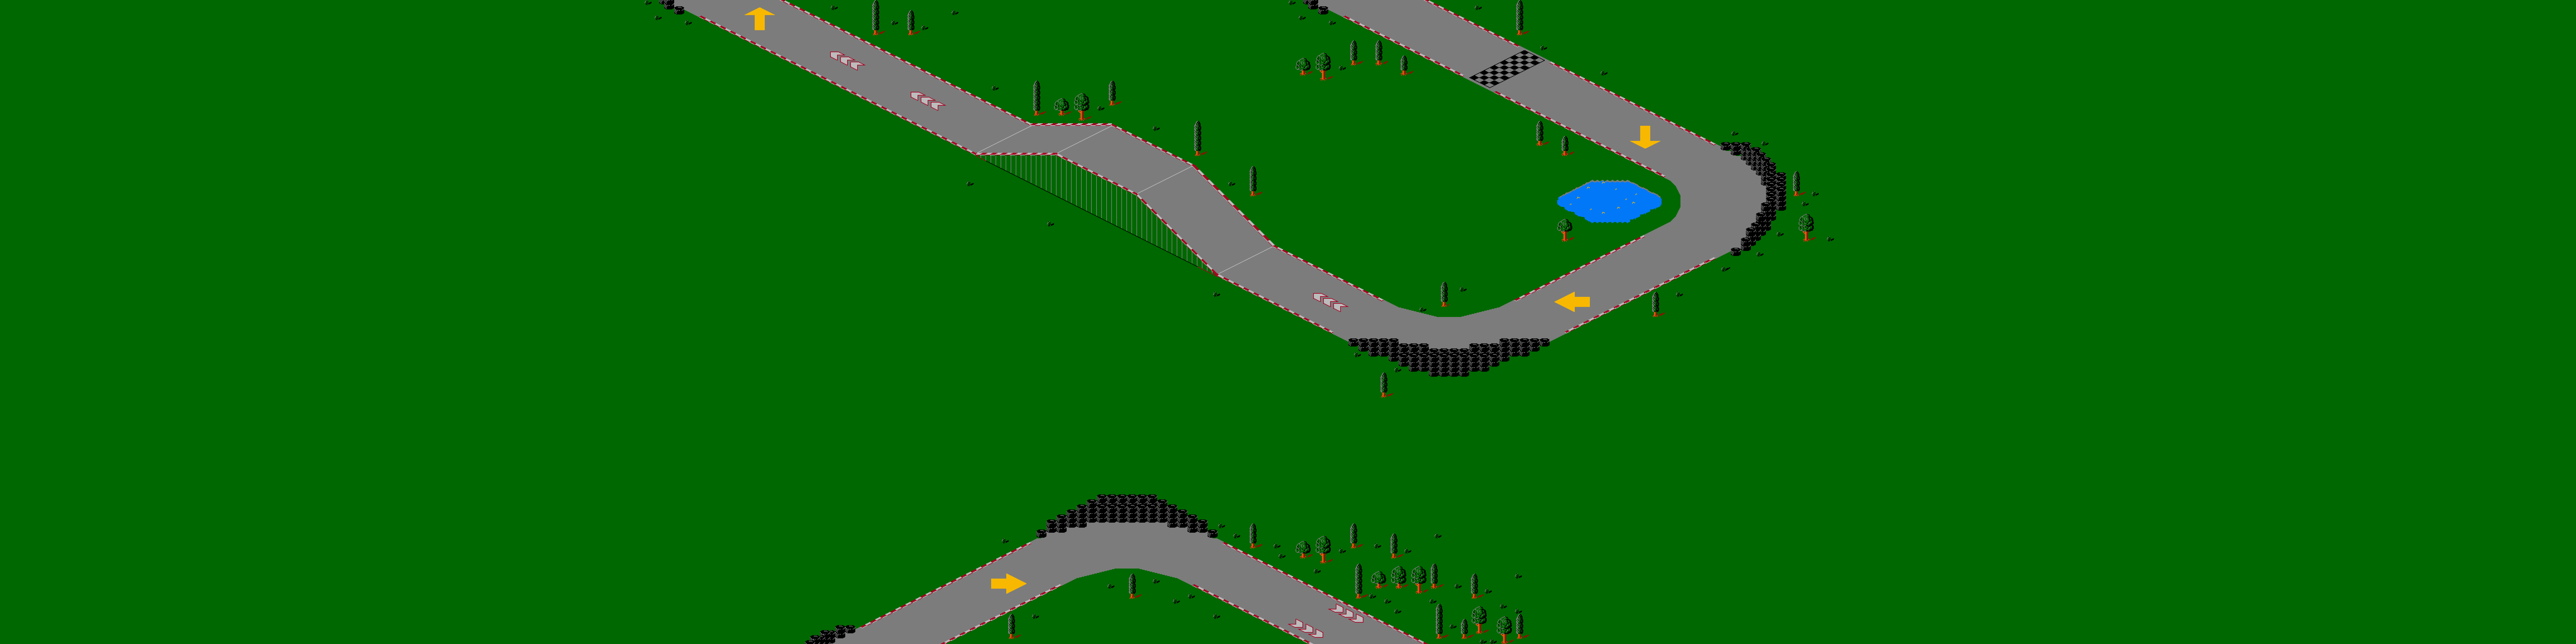

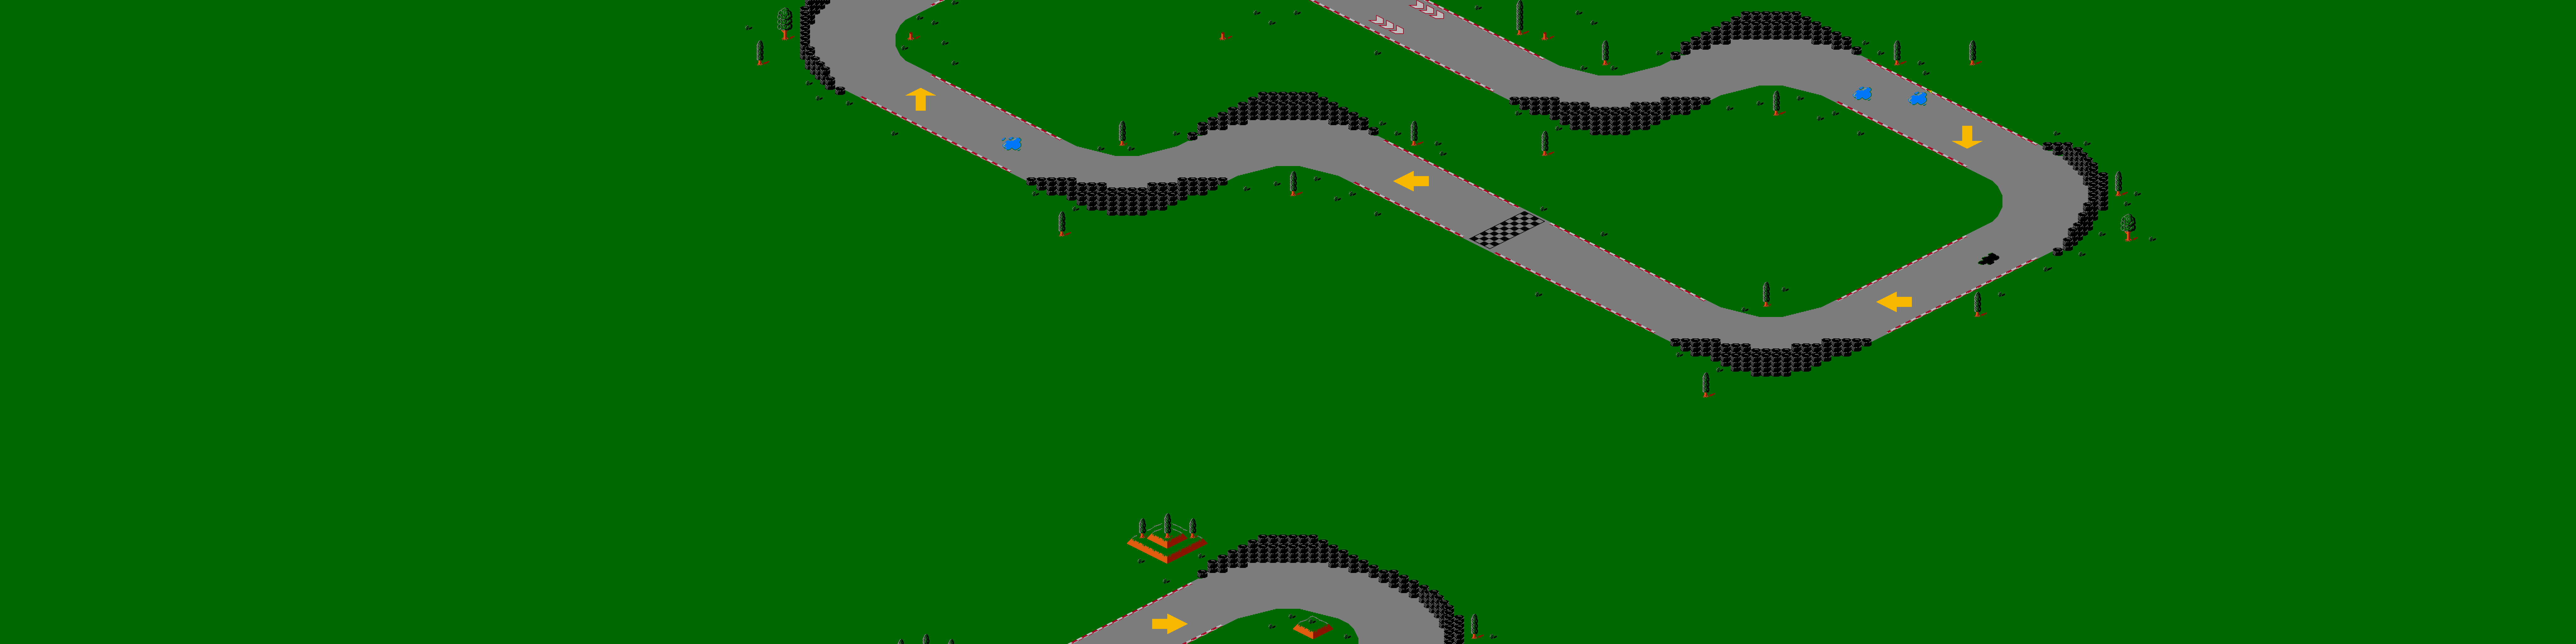

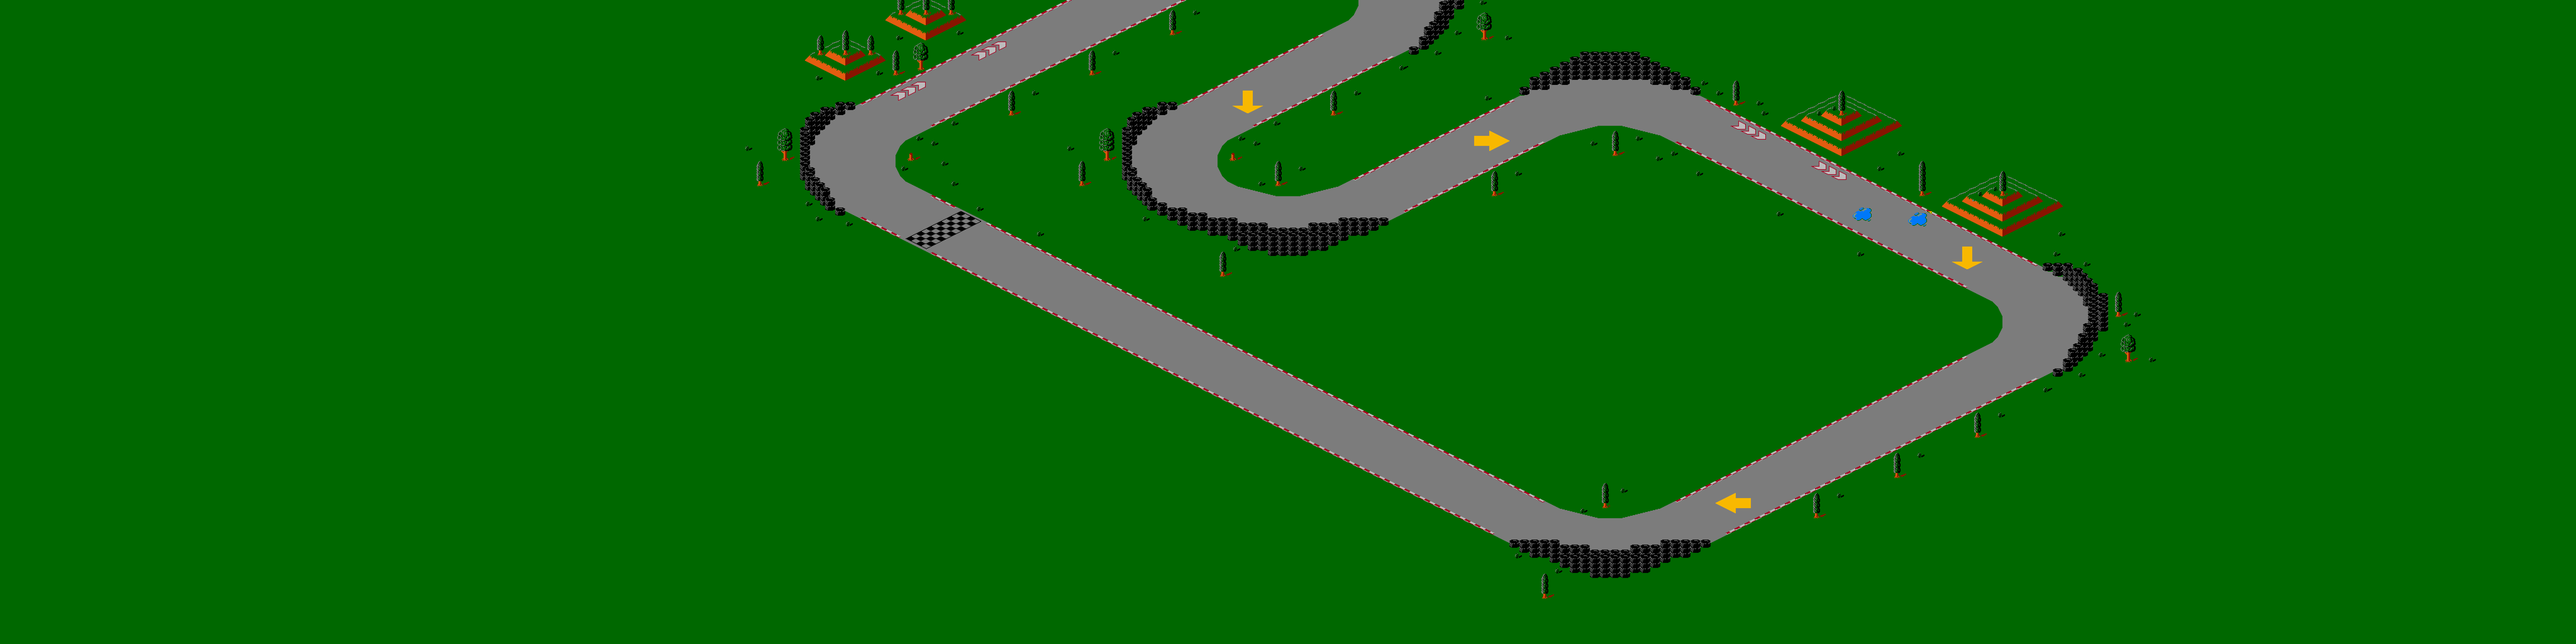

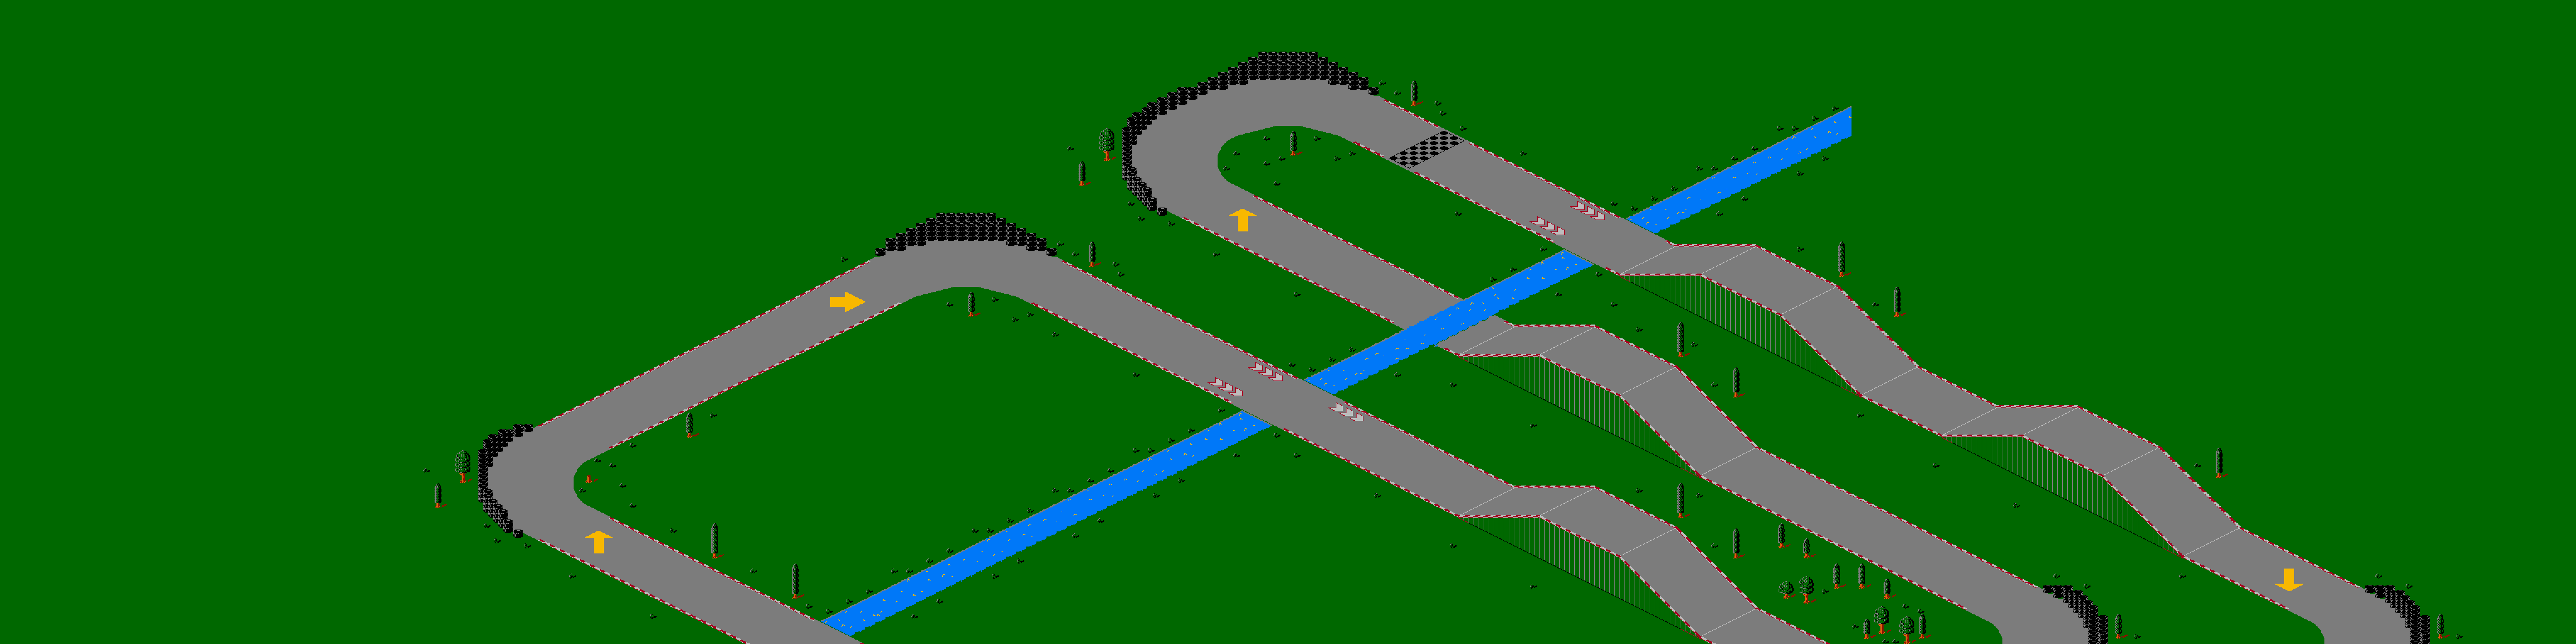

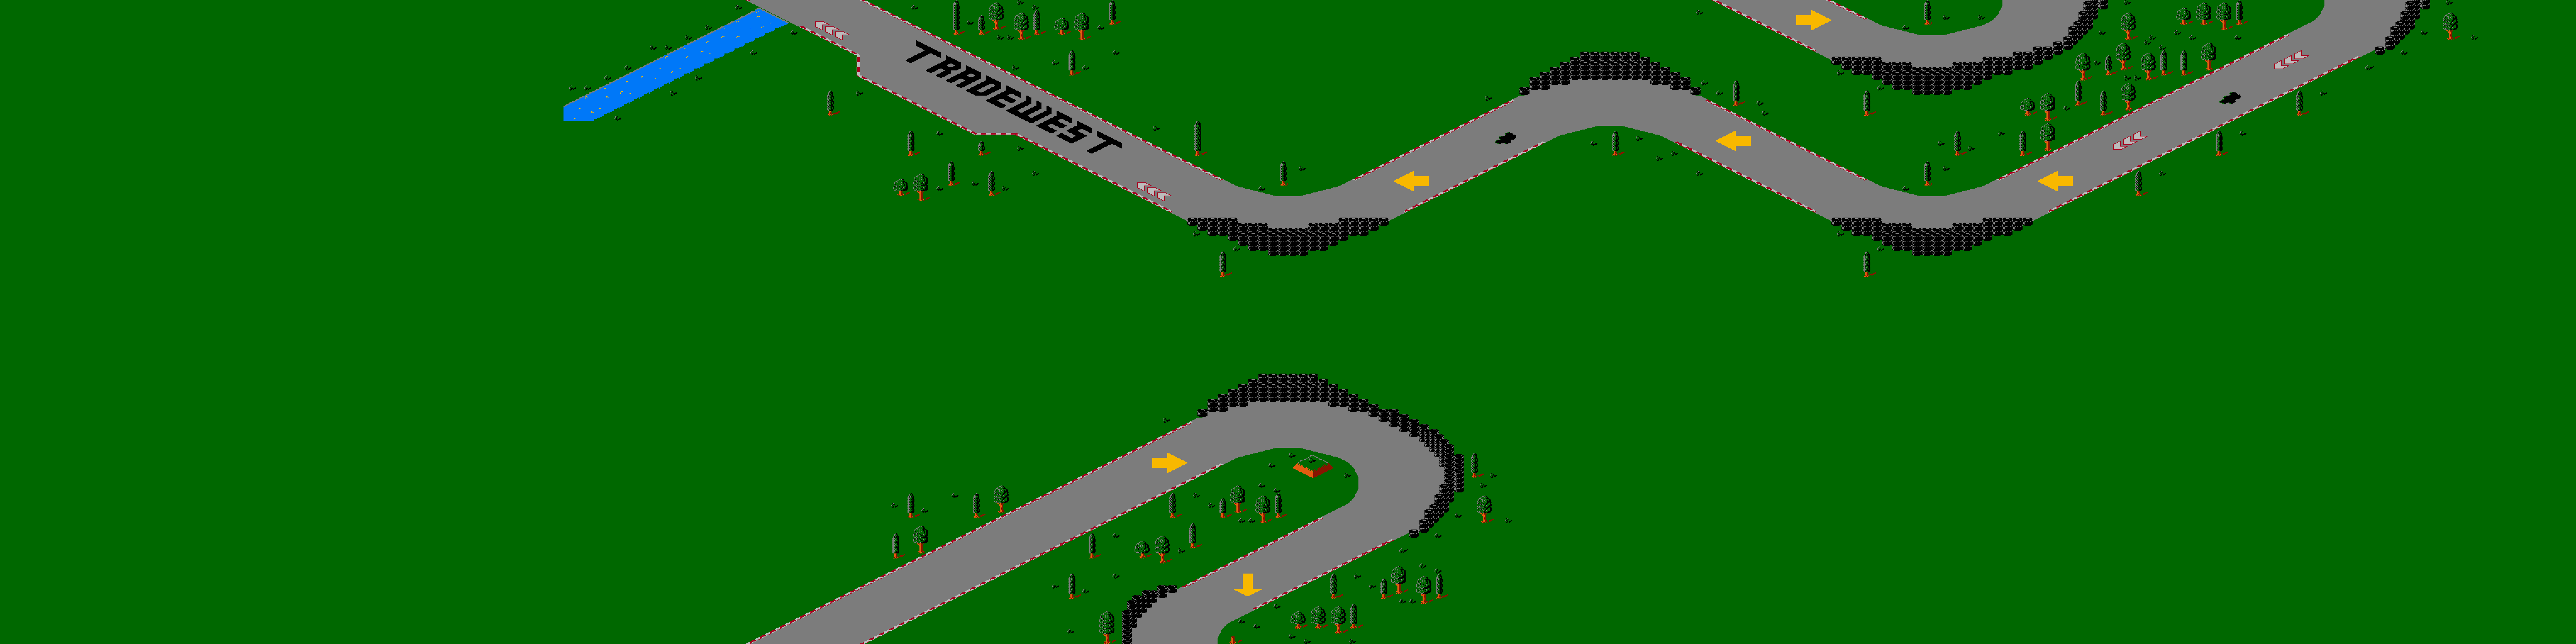

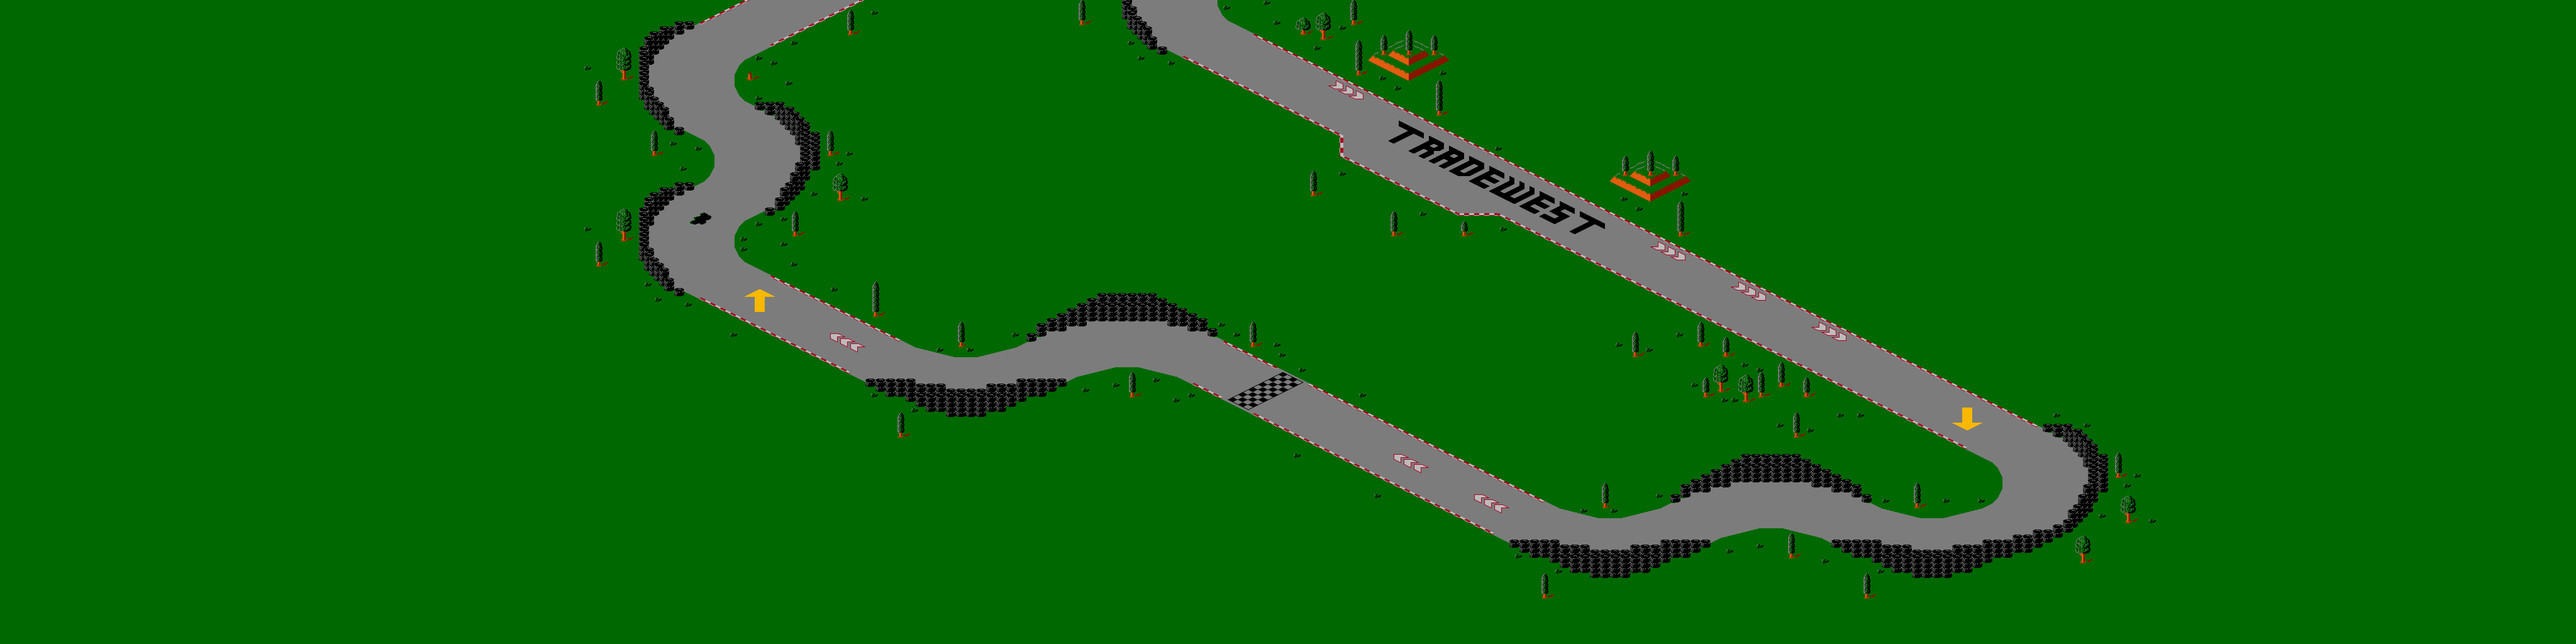

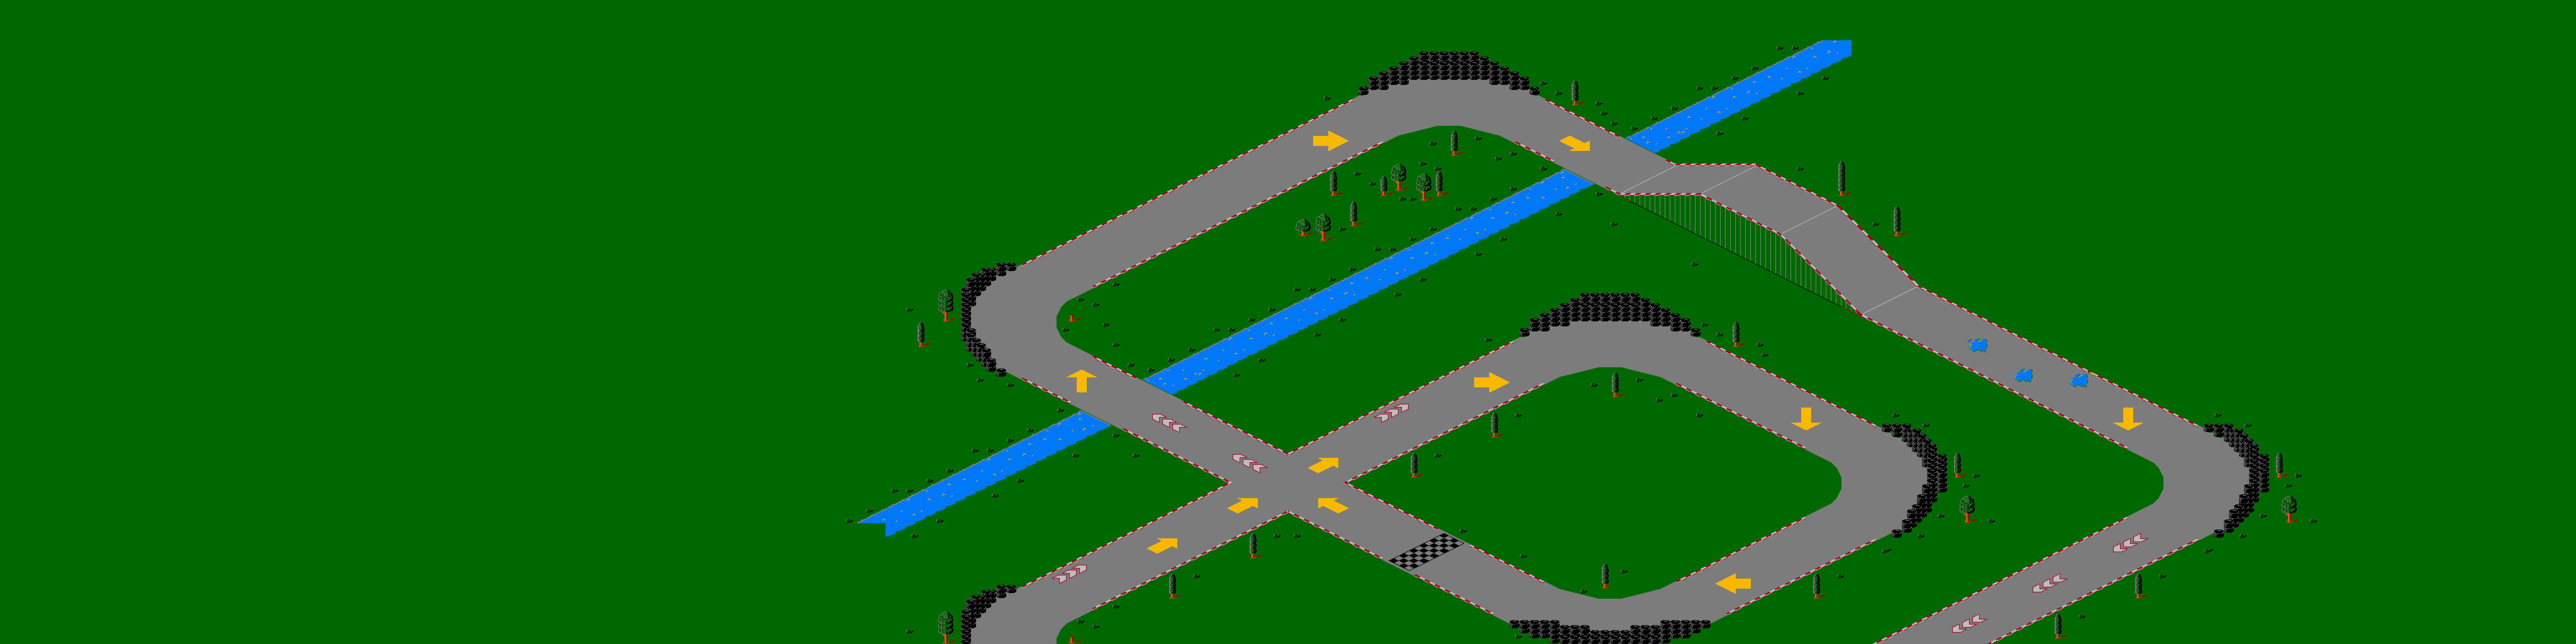

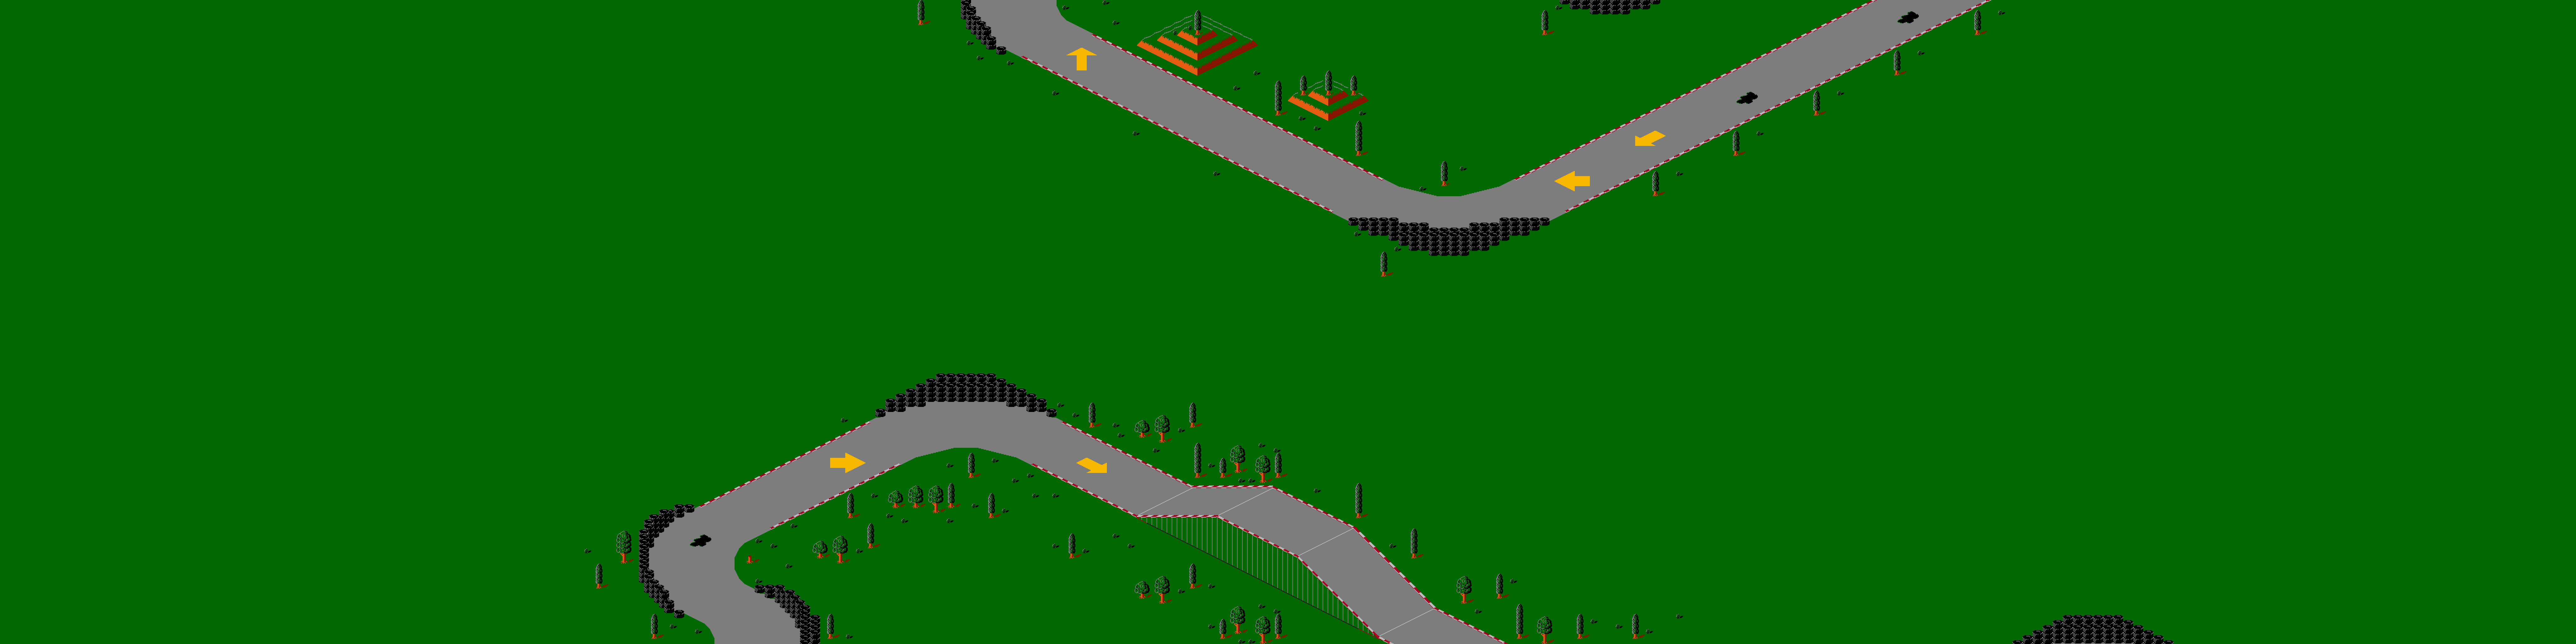

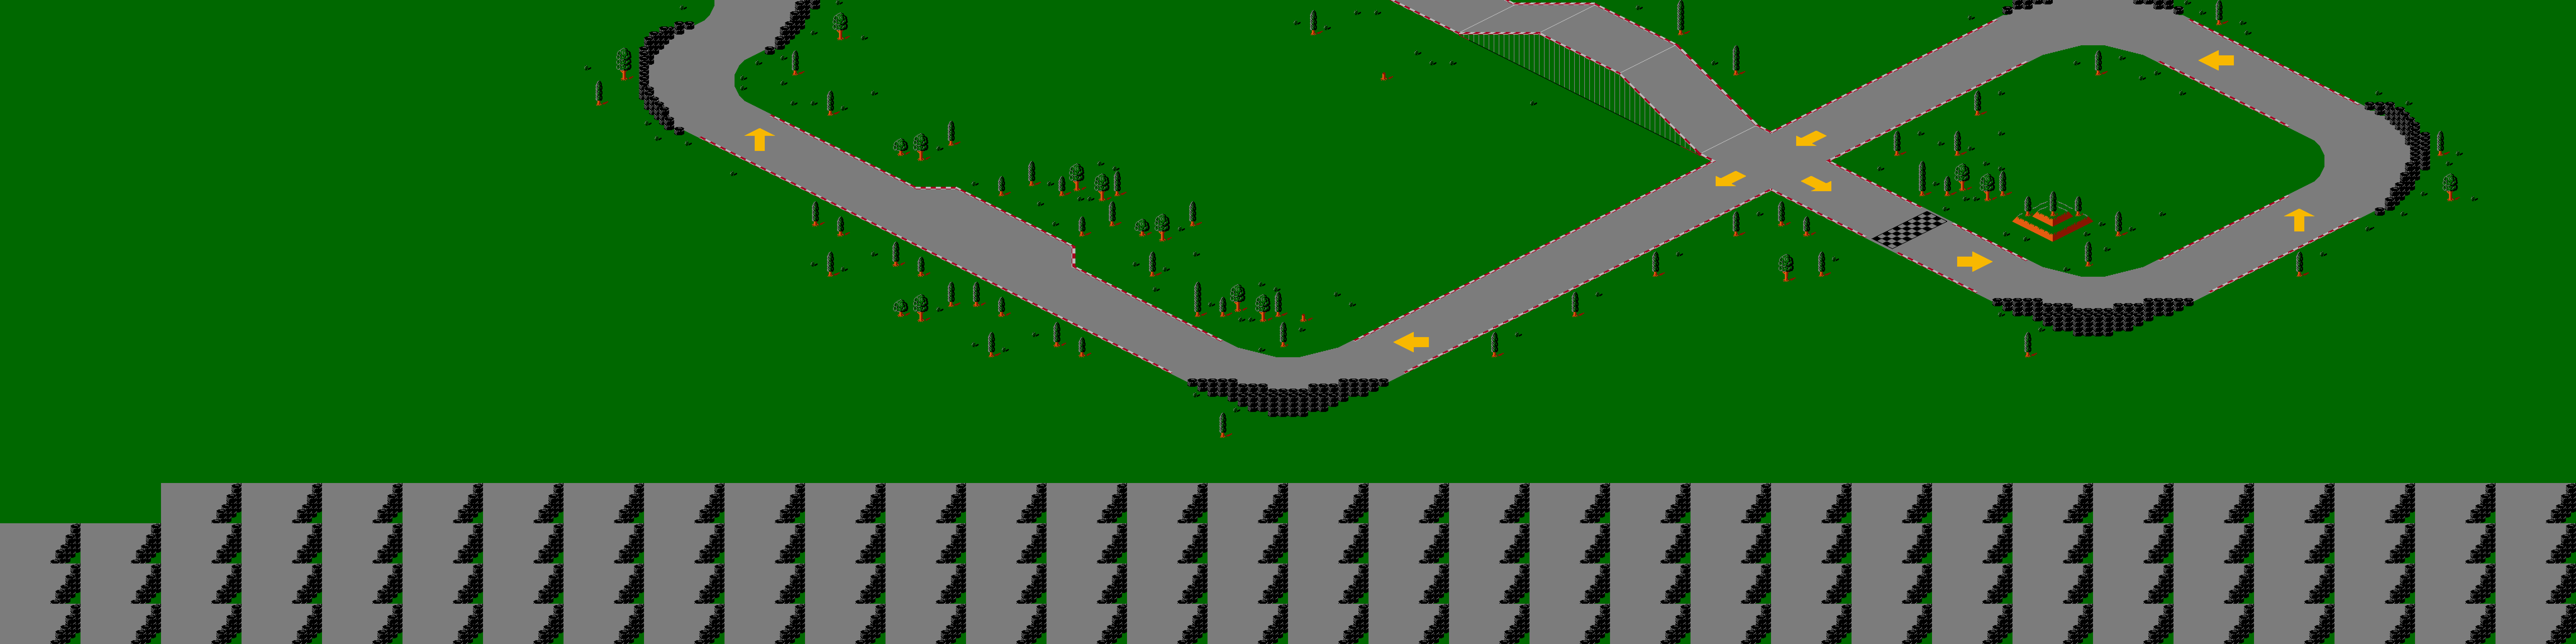

In [11]:
for scrNo in xrange(11):
    SCR_SIZE = 32*16
    SCR_ADDR = 0x8ABA + SCR_SIZE*scrNo
    scrData = d[SCR_ADDR:SCR_ADDR + SCR_SIZE]
    scrData = map(ord, scrData)
    
    scrImages = [blockImages[x] for x in scrData]
    scr = UtilsGDI.GlueImages(Array[Bitmap](scrImages),32,16)
    scr.Save(picPath+"scr_%d.png"%scrNo)
    display(Image(filename=picPath+"scr_%d.png"%scrNo))